In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Uber_proper_format')

In [3]:
df.head(10)

,fare_amount,passenger_count,year,month,day,day_is_weekend,quarter,hour,mins,distance_travelled
0,7.50,1.0,2015.0,5.0,7.0,0.0,2.0,19.0,52.0,1.683323
1,7.70,1.0,2009.0,7.0,17.0,0.0,3.0,20.0,4.0,2.457590
2,12.90,1.0,2009.0,8.0,24.0,0.0,3.0,21.0,45.0,5.036377
3,5.30,3.0,2009.0,6.0,26.0,0.0,2.0,8.0,22.0,1.661683
4,16.00,3.5,2014.0,8.0,28.0,0.0,3.0,17.0,47.0,4.475450
5,4.90,1.0,2011.0,2.0,12.0,1.0,1.0,2.0,27.0,0.000000
6,22.25,3.5,2014.0,10.0,12.0,1.0,4.0,7.0,4.0,7.865091
7,2.50,1.0,2012.0,12.0,11.0,0.0,4.0,13.0,52.0,0.000000
8,9.70,1.0,2012.0,2.0,17.0,0.0,1.0,9.0,32.0,2.332711
9,12.50,1.0,2012.0,3.0,29.0,0.0,1.0,19.0,6.0,4.889417


In [4]:
df.shape

(199999, 10)

In [5]:
X = df.iloc[:,1:]
y= df.iloc[:,:1]

In [6]:
X.shape , y.shape

((199999, 9), (199999, 1))

In [7]:
y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
199994,3.00
199995,7.50
199996,22.25
199997,14.50


In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [9]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((149999, 9), (50000, 9), (149999, 1), (50000, 1))

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred1 = lr.predict(X_test)

Text(0, 0.5, 'Predicted')

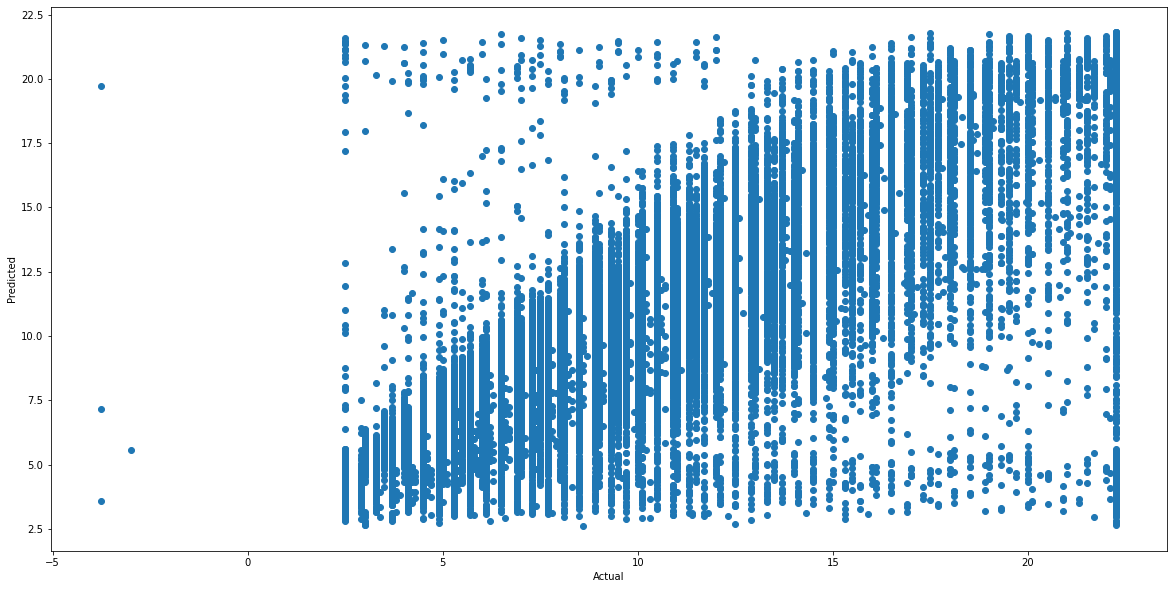

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [15]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error

In [16]:
lorR2=r2_score(y_test,y_pred1)

## GB Regression

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
gbr = GradientBoostingRegressor()

In [19]:
gbr.fit(X_train,y_train)

C:\Users\ADMIN\New folder\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [20]:
y_pred2 = gbr.predict(X_test)

In [21]:
mean_squared_error(y_test,y_pred2)

6.3379498018471025

In [22]:
gbR2=r2_score(y_test,y_pred2)

## ElasticNet Regression

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
el = ElasticNet()

In [25]:
el.fit(X_train,y_train)

ElasticNet()

In [26]:
y_pred3 = el.predict(X_test)

In [27]:
elR2=r2_score(y_test,y_pred3)

## SGDRegression

In [28]:
from sklearn.linear_model import SGDRegressor



In [29]:
sgd = SGDRegressor()

In [30]:
sgd.fit(X_train,y_train)

C:\Users\ADMIN\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [31]:
y_pred4 = sgd.predict(X_test)

In [32]:
sgdR2=r2_score(y_test,y_pred4)

## Bayesian Ridge Regression


In [33]:
from sklearn.linear_model import BayesianRidge

In [34]:
br = BayesianRidge()

In [35]:
br.fit(X_train , y_train)

C:\Users\ADMIN\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [36]:
y_pred5 = br.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test,y_pred5)

7.977562142565921

In [39]:
brR2=r2_score(y_test,y_pred5)

## XGBoost Regressor

In [40]:
from xgboost.sklearn import XGBRegressor

In [41]:
xgb =XGBRegressor()

In [42]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
y_pred6 = xgb.predict(X_test)

In [44]:
xgbR2=r2_score(y_test,y_pred6)

In [45]:
mean_squared_error(y_test,y_pred6)

6.28607101480041

## LGBM Regressor


In [46]:
! pip install lightgbm

In [47]:
from lightgbm import LGBMRegressor

In [48]:
lgbm = LGBMRegressor()

In [49]:
lgbm.fit(X_train,y_train)

LGBMRegressor()

In [50]:
y_pred7 = lgbm.predict(X_test)

In [51]:
lgbmR2 = r2_score(y_test,y_pred7)

##  CatBoost Regression

In [52]:
!pip install catboost

In [53]:
from catboost import CatBoostRegressor

In [54]:
cbr = CatBoostRegressor()

In [55]:
cbr.fit(X_train,y_train)

Learning rate set to 0.090365
0:	learn: 5.0887578	total: 163ms	remaining: 2m 42s
1:	learn: 4.7683898	total: 186ms	remaining: 1m 32s
2:	learn: 4.4877224	total: 200ms	remaining: 1m 6s
3:	learn: 4.2405789	total: 215ms	remaining: 53.5s
4:	learn: 4.0202805	total: 229ms	remaining: 45.5s
5:	learn: 3.8226504	total: 242ms	remaining: 40.1s
6:	learn: 3.6575212	total: 255ms	remaining: 36.2s
7:	learn: 3.5070214	total: 268ms	remaining: 33.3s
8:	learn: 3.3759491	total: 282ms	remaining: 31s
9:	learn: 3.2618063	total: 295ms	remaining: 29.2s
10:	learn: 3.1665527	total: 308ms	remaining: 27.7s
11:	learn: 3.0803781	total: 322ms	remaining: 26.5s
12:	learn: 3.0078155	total: 335ms	remaining: 25.4s
13:	learn: 2.9433520	total: 347ms	remaining: 24.5s
14:	learn: 2.8879598	total: 361ms	remaining: 23.7s
15:	learn: 2.8406979	total: 379ms	remaining: 23.3s
16:	learn: 2.8008175	total: 394ms	remaining: 22.8s
17:	learn: 2.7659446	total: 407ms	remaining: 22.2s
18:	learn: 2.7373441	total: 420ms	remaining: 21.7s
19:	learn: 

173:	learn: 2.4809963	total: 2.58s	remaining: 12.2s
174:	learn: 2.4808810	total: 2.59s	remaining: 12.2s
175:	learn: 2.4806522	total: 2.6s	remaining: 12.2s
176:	learn: 2.4803263	total: 2.61s	remaining: 12.2s
177:	learn: 2.4801160	total: 2.63s	remaining: 12.1s
178:	learn: 2.4799059	total: 2.64s	remaining: 12.1s
179:	learn: 2.4797524	total: 2.65s	remaining: 12.1s
180:	learn: 2.4795951	total: 2.67s	remaining: 12.1s
181:	learn: 2.4794413	total: 2.68s	remaining: 12s
182:	learn: 2.4792283	total: 2.69s	remaining: 12s
183:	learn: 2.4790469	total: 2.7s	remaining: 12s
184:	learn: 2.4788545	total: 2.71s	remaining: 12s
185:	learn: 2.4786005	total: 2.73s	remaining: 11.9s
186:	learn: 2.4783807	total: 2.74s	remaining: 11.9s
187:	learn: 2.4776408	total: 2.75s	remaining: 11.9s
188:	learn: 2.4774378	total: 2.77s	remaining: 11.9s
189:	learn: 2.4771403	total: 2.78s	remaining: 11.9s
190:	learn: 2.4767786	total: 2.8s	remaining: 11.8s
191:	learn: 2.4765194	total: 2.81s	remaining: 11.8s
192:	learn: 2.4762535	t

338:	learn: 2.4478157	total: 4.78s	remaining: 9.32s
339:	learn: 2.4477304	total: 4.79s	remaining: 9.3s
340:	learn: 2.4474964	total: 4.81s	remaining: 9.29s
341:	learn: 2.4473844	total: 4.82s	remaining: 9.27s
342:	learn: 2.4471715	total: 4.83s	remaining: 9.26s
343:	learn: 2.4470565	total: 4.84s	remaining: 9.24s
344:	learn: 2.4468328	total: 4.86s	remaining: 9.22s
345:	learn: 2.4467693	total: 4.87s	remaining: 9.21s
346:	learn: 2.4466488	total: 4.88s	remaining: 9.19s
347:	learn: 2.4465796	total: 4.9s	remaining: 9.17s
348:	learn: 2.4464056	total: 4.91s	remaining: 9.16s
349:	learn: 2.4462638	total: 4.92s	remaining: 9.14s
350:	learn: 2.4461930	total: 4.93s	remaining: 9.13s
351:	learn: 2.4460880	total: 4.95s	remaining: 9.11s
352:	learn: 2.4460240	total: 4.96s	remaining: 9.09s
353:	learn: 2.4457892	total: 4.97s	remaining: 9.08s
354:	learn: 2.4456410	total: 4.99s	remaining: 9.07s
355:	learn: 2.4455001	total: 5s	remaining: 9.05s
356:	learn: 2.4454145	total: 5.02s	remaining: 9.04s
357:	learn: 2.445

499:	learn: 2.4243369	total: 7s	remaining: 7s
500:	learn: 2.4242672	total: 7.01s	remaining: 6.99s
501:	learn: 2.4241752	total: 7.03s	remaining: 6.97s
502:	learn: 2.4240903	total: 7.04s	remaining: 6.96s
503:	learn: 2.4240135	total: 7.05s	remaining: 6.94s
504:	learn: 2.4238587	total: 7.07s	remaining: 6.93s
505:	learn: 2.4237829	total: 7.08s	remaining: 6.91s
506:	learn: 2.4236360	total: 7.09s	remaining: 6.9s
507:	learn: 2.4235509	total: 7.11s	remaining: 6.88s
508:	learn: 2.4234869	total: 7.12s	remaining: 6.87s
509:	learn: 2.4232841	total: 7.13s	remaining: 6.85s
510:	learn: 2.4231374	total: 7.14s	remaining: 6.84s
511:	learn: 2.4230604	total: 7.16s	remaining: 6.82s
512:	learn: 2.4229907	total: 7.17s	remaining: 6.8s
513:	learn: 2.4227536	total: 7.18s	remaining: 6.79s
514:	learn: 2.4226425	total: 7.2s	remaining: 6.78s
515:	learn: 2.4225024	total: 7.21s	remaining: 6.76s
516:	learn: 2.4223230	total: 7.22s	remaining: 6.75s
517:	learn: 2.4219844	total: 7.24s	remaining: 6.73s
518:	learn: 2.4218571

661:	learn: 2.4054789	total: 9.19s	remaining: 4.69s
662:	learn: 2.4053614	total: 9.2s	remaining: 4.68s
663:	learn: 2.4051083	total: 9.21s	remaining: 4.66s
664:	learn: 2.4050644	total: 9.23s	remaining: 4.65s
665:	learn: 2.4049549	total: 9.24s	remaining: 4.63s
666:	learn: 2.4048884	total: 9.25s	remaining: 4.62s
667:	learn: 2.4048312	total: 9.27s	remaining: 4.61s
668:	learn: 2.4047559	total: 9.28s	remaining: 4.59s
669:	learn: 2.4046298	total: 9.29s	remaining: 4.58s
670:	learn: 2.4045623	total: 9.31s	remaining: 4.56s
671:	learn: 2.4044229	total: 9.32s	remaining: 4.55s
672:	learn: 2.4043035	total: 9.33s	remaining: 4.53s
673:	learn: 2.4042421	total: 9.35s	remaining: 4.52s
674:	learn: 2.4040998	total: 9.36s	remaining: 4.51s
675:	learn: 2.4039937	total: 9.37s	remaining: 4.49s
676:	learn: 2.4039230	total: 9.39s	remaining: 4.48s
677:	learn: 2.4038677	total: 9.4s	remaining: 4.46s
678:	learn: 2.4038101	total: 9.42s	remaining: 4.45s
679:	learn: 2.4036788	total: 9.43s	remaining: 4.44s
680:	learn: 2.

824:	learn: 2.3879647	total: 11.4s	remaining: 2.42s
825:	learn: 2.3878662	total: 11.4s	remaining: 2.4s
826:	learn: 2.3878082	total: 11.4s	remaining: 2.39s
827:	learn: 2.3877224	total: 11.4s	remaining: 2.37s
828:	learn: 2.3876740	total: 11.4s	remaining: 2.36s
829:	learn: 2.3876126	total: 11.5s	remaining: 2.35s
830:	learn: 2.3875417	total: 11.5s	remaining: 2.33s
831:	learn: 2.3874749	total: 11.5s	remaining: 2.32s
832:	learn: 2.3874097	total: 11.5s	remaining: 2.31s
833:	learn: 2.3873439	total: 11.5s	remaining: 2.29s
834:	learn: 2.3872557	total: 11.5s	remaining: 2.28s
835:	learn: 2.3871817	total: 11.5s	remaining: 2.26s
836:	learn: 2.3870596	total: 11.6s	remaining: 2.25s
837:	learn: 2.3869813	total: 11.6s	remaining: 2.23s
838:	learn: 2.3869039	total: 11.6s	remaining: 2.22s
839:	learn: 2.3868470	total: 11.6s	remaining: 2.21s
840:	learn: 2.3867750	total: 11.6s	remaining: 2.19s
841:	learn: 2.3866234	total: 11.6s	remaining: 2.18s
842:	learn: 2.3864764	total: 11.6s	remaining: 2.17s
843:	learn: 2

988:	learn: 2.3724318	total: 13.6s	remaining: 151ms
989:	learn: 2.3723887	total: 13.6s	remaining: 137ms
990:	learn: 2.3722748	total: 13.6s	remaining: 124ms
991:	learn: 2.3722057	total: 13.6s	remaining: 110ms
992:	learn: 2.3720479	total: 13.6s	remaining: 96.1ms
993:	learn: 2.3719330	total: 13.7s	remaining: 82.4ms
994:	learn: 2.3718097	total: 13.7s	remaining: 68.7ms
995:	learn: 2.3717385	total: 13.7s	remaining: 54.9ms
996:	learn: 2.3716744	total: 13.7s	remaining: 41.2ms
997:	learn: 2.3715577	total: 13.7s	remaining: 27.5ms
998:	learn: 2.3714935	total: 13.7s	remaining: 13.7ms
999:	learn: 2.3714166	total: 13.7s	remaining: 0us


In [56]:
y_pred8 = cbr.predict(X_test)

In [57]:
cbrR2 = r2_score(y_test,y_pred8)

## Decision tree regressor

In [58]:
 from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr = DecisionTreeRegressor(max_depth =11)

In [60]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11)

In [61]:
y_pred9 = dtr.predict(X_test)

In [62]:
dtrR2 =r2_score(y_test,y_pred9)

## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rft = RandomForestRegressor(max_depth=15)

In [65]:
rft.fit(X_train,y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\2008440294.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(X_train,y_train)


RandomForestRegressor(max_depth=15)

In [66]:
y_pred = rft.predict(X_test)

In [67]:
rfR2=r2_score(y_test,y_pred)

## Results before Hypertuning 

In [68]:
model_list =[' Linear Regression','ElasticNet Regression','SGDRegression','Bayesian Ridge Regression','XGBoost Regressor',' LGBM Regressor','CatBoost Regression','Decision tree regressor','Random Forest']

In [69]:
model_score = [lorR2,gbR2,elR2,sgdR2,brR2,xgbR2,lgbmR2,cbrR2,dtrR2,rfR2]

In [81]:
df = pd.DataFrame(list(zip(model_list, model_score)),
               columns =['Model', 'R2-Score'])

In [82]:
df=np.round(df,2)

In [83]:
df

,Model,R2-Score
0,Linear Regression,7.300000e-01
1,ElasticNet Regression,7.900000e-01
2,SGDRegression,7.100000e-01
3,Bayesian Ridge Regression,-4.428990e+27
4,XGBoost Regressor,7.300000e-01
5,LGBM Regressor,7.900000e-01
6,CatBoost Regression,7.900000e-01
7,Decision tree regressor,7.900000e-01
8,Random Forest,7.700000e-01


## Hyperparameter Tuning

### Random Forest Regressor

In [72]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [73]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [74]:
rf1 = RandomForestRegressor()

In [75]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf1, 
                       param_distributions= param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [76]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ADMIN\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\New folder\lib\site-packages\sklearn\ensemble\_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Us

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [77]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 1.0,
 'max_depth': 8,
 'bootstrap': True}

In [78]:
rf_grid.best_score_

0.78294139629557

In [79]:
rf1 = RandomForestRegressor(max_depth=8,n_estimators= 100,max_samples=0.5,max_features=1.0)

In [80]:
rf1.fit(X_train,y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\526077064.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train,y_train)


KeyboardInterrupt: 

In [ ]:
y_pred = rf1.predict(X_test)

In [ ]:
rfRR=r2_score(y_test,y_pred)

In [ ]:
rfRR